<a href="https://colab.research.google.com/github/vidisha-ml/Machine-learning/blob/main/multiple_linear_regression/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df= pd.read_csv('50_Startups.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
residuals = y_predict-y_test
np.set_printoptions(precision=2)
print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))
print("Residuals: ",residuals)


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
Residuals:  [  -267.18 -11677.12 -13674.21  -5822.73 -12512.91  11152.93 -13377.37
   1308.17   3617.19   1733.13]


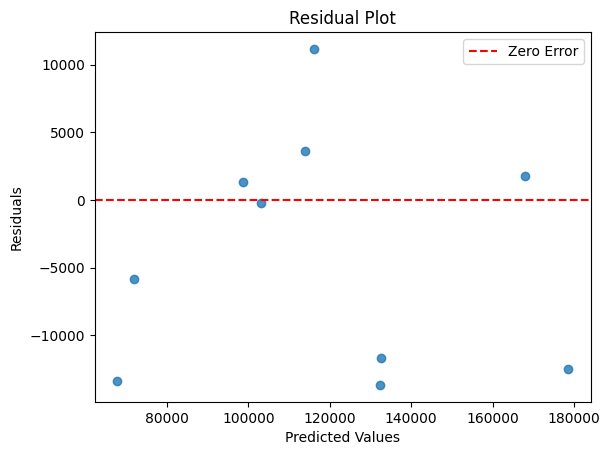

In [19]:
# Create a residual plot
plt.scatter(y_predict, residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()